 # Oasis Infobyte Internship
 ###### February-P1 Batch Submission ✍️
 ## Author -  DHANANJAY NERKAR

# Sales Prediction Using Python

Basically, predicting something by instinct is human nature. Everyone learns from the past to predict the future. But, what about the engine?

To predict the future, the machine will learn from historical data. They will find certain patterns to produce predictions for the future, with mathematics.

Here, we will learn how to make machine learning to predict sales generated from advertisements shown on TV, Radio and Newsletters. We will apply what is called Linear Regression. This is a simple equation included in supervised learning.

## Dataset
You can download the dataset at https://www.kaggle.com/datasets/ashydv/advertising-dataset.

## Simple Linear Regression
Now let’s start by importing the required libraries. First, create a new code block and type the following code into it:

In [1]:
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

Let’s load the dataset with the read_csv method to open the advertising.csv file from the datasets folder and display the top five records with the head method:

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df = df.drop(["Unnamed: 0"],axis=1)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


You can see this output. The Sales column is the dependent variable (symbolized as y) that we will use when we create the model. Of course, the dependent variable is separate from the feature variable (symbolized as x).

Next, let’s check if there is a null value:

In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In case of regression, make sure the data has no null values because regression will not work if any of the data has null values.

Correlation analysis is an important part when we want to build a model. We must understand how the independent variable has a correlation with the dependent variable. For this, we can create a heatmap that can explain the correlation between the columns in the dataset:

<AxesSubplot: >

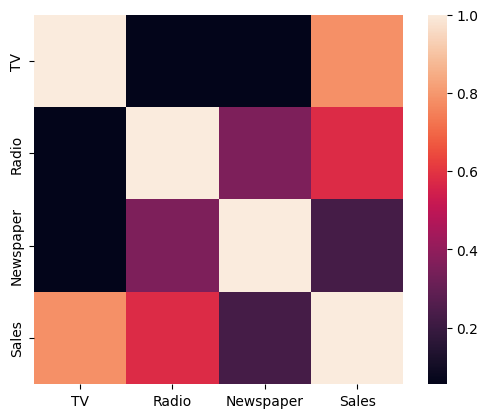

In [6]:
sns.heatmap(df.corr(), square=True)

Since we want to build a linear regression model, we need to find some independent variables that have a significant correlation with the Sales variable (as the target variable).

Here, TV has a positive correlation with Sales. So, we will take TV as a feature (X) and Sales as a predictor (y) for the regression model we are going to create. We will use seaborn’s lmplot method to see the correlation between TV and Sales:

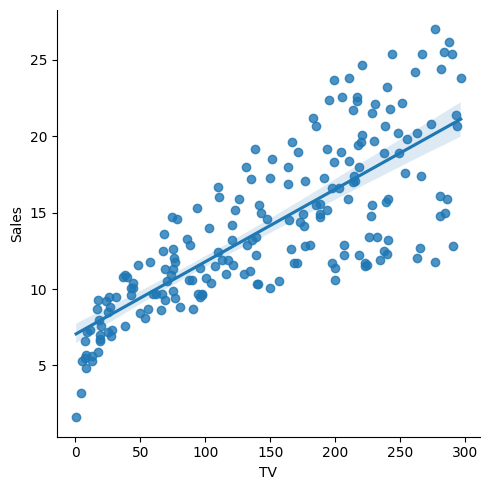

In [7]:
sns.lmplot(x='TV', y='Sales', data=df)

From this plot shows a strong correlation between these two variables. Now, let’s create the features and target variables in an array like this:

In [8]:
X = df[['TV']]
y = df.Sales

## Create and Train Models
Before doing the training, we need to divide the data into two. Data for training and data for testing. Sklearn provides a train_test_split() function that can split a dataset into training and testing data:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X is the independent variable and Y is the target variable (output). In train_test_split, test_size indicates the size of the dataset for testing. The value of 0.3 means that the data is divided into 70% for training and 30% for testing. random_state to randomize the training and test data.

The train_test_split() function returns four values in an array of X for training and testing and y for training and testing.

Next, we’ll train the linear regression model using LinearRegression() from the sklearn library with the training dataset:

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Now, we have a model that we store in a model variable that has been trained using the training data. The next step is to evaluate how well the model can predict the target variable.

## Prediction
we can get the coefficient and intercept values from the model using attributes like coef_ and intercept_:

In [11]:
print(model.coef_)
print(model.intercept_)

[0.04474675]
7.308260742166187


We can also get prediction results from the model using the predict method as follows:

In [12]:
model.predict([[40]])

C:\Users\15dha\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.09813086])

Then, we can use the predict method to predict more than one X data with the same method:

In [13]:
y_pred = model.predict(X_test)

To see the comparison of the actual data with the predicted data, we can run the following code:

In [14]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': y_pred.flatten()})

act_predict.head(5)

,Actual,Predict
0,18.4,16.736402
1,7.2,7.697557
2,18.0,17.080952
3,25.5,19.998440
4,22.6,16.991458


The difference between actual and predicted data is not too far. To make it easier to read, we can plot using the following code:

Next, a bar plot will appear that provides insight into the difference between the actual and predicted data as shown below:



<AxesSubplot: >

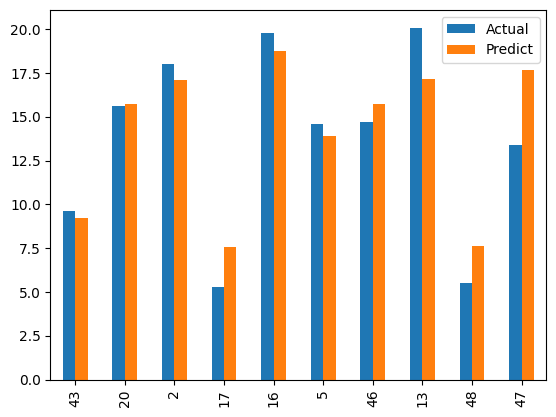

In [15]:
act_predict.sample(10).plot(kind='bar')

## Model Evaluation
Type and run the following code to determine the accuracy of the model we created using R2 Score with parameters X_test and y_test:

In [16]:
model.score(X_test, y_test)

0.6447879078216139

The value we get can be different, not always exactly like this result (0.8288743166580128). And of course the score we get is very good. If the score is 1, it means that the model we made is very perfect. If the value is 0, our model is very bad. In conclusion, the score that is close to 1 means the performance of the model that has been trained is getting better.

## Multiple Linear Regression
The dependent variable can depend on several independent variables, this relationship can be handled using multiple linear regression. In this case, Sales doesn’t just depend on the TV. It is possible that Sales also depend on other features such as Radio and Newsletters.

So, we can apply many features (X) to get prediction (output Y). Multiple linear regression can be called as an extension of simple linear regression.

To create multiple linear regression, we can modify a bit of code in ipynb. Find the following code block:

In [17]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df.Sales

then, rerun the below code

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.3, random_state = 10)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Finally, run the block code to get the score:

In [20]:
print("The scores we get from multiple linear regression are:")
model.score(X_test, y_test)

The scores we get from multiple linear regression are:


0.8567790678044409

From the results we get, The accuracy value increases as we add more features. This value is better than the previous score.